In [120]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [121]:
df=pd.read_csv('C:\\Users\\Omar_Abdelhamid\\OneDrive\\Desktop\\Data Science\\My projects\\bank+marketing\\bank\\bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [122]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### let's make some changes 
 - rename the Y column to (subscribed ) and change it's type to catigorecal
    - rename the pday column to (last contacted) , change values (1,-1) to (not contacted) change type to catigorecal
    - change the values of duration column from seconds to minutes by divetion by 60
    - delete unusful column (default - previous contacted - last contacted) 

In [124]:
df.rename(columns={'y': 'subscribed', 'pdays': 'last contacted' , 'previous': 'previous contacted', 'campaign': 'campaign contacted','contact': 'contact type'}, inplace=True)

In [125]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact type,day,month,duration,campaign contacted,last contacted,previous contacted,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [126]:
df['job']=df['job'].astype('category')
df['marital']=df['marital'].astype('category')
df['education']=df['education'].astype('category')
df['housing']=df['housing'].astype('category')
df['loan']=df['loan'].astype('category')
df['contact type']=df['contact type'].astype('category')
df['month']=df['month'].astype('category')
df['poutcome']=df['poutcome'].astype('category')
df['subscribed']=df['subscribed'].astype('category')

In [127]:
df['last contacted']=df['last contacted'].astype('category')

In [128]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact type,day,month,duration,campaign contacted,last contacted,previous contacted,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [129]:
df.drop(columns=['last contacted','default','previous contacted'], inplace=True)

In [130]:
df.head()

,age,job,marital,education,balance,housing,loan,contact type,day,month,duration,campaign contacted,poutcome,subscribed
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,unknown,no


In [131]:
df['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [132]:
# let's delete the poutcome column becasue the most of values unknown
df.drop(columns=['poutcome'], inplace=True)

In [133]:
#confirt duration from Sec to min
df['duration']=df['duration']/60

In [134]:
df['day']=df['day'].astype(str)
df['month']=df['month'].astype(str)

In [135]:
df['date']=df['day']+'-'+df['month']+'-'+'2011'

In [136]:
df.head()

,age,job,marital,education,balance,housing,loan,contact type,day,month,duration,campaign contacted,subscribed,date
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,4.350000,1,no,5-may-2011
1,44,technician,single,secondary,29,yes,no,unknown,5,may,2.516667,1,no,5-may-2011
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,1.266667,1,no,5-may-2011
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,1.533333,1,no,5-may-2011
4,33,unknown,single,unknown,1,no,no,unknown,5,may,3.300000,1,no,5-may-2011


In [137]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%b-%Y'))

In [138]:
df.head()

,age,job,marital,education,balance,housing,loan,contact type,day,month,duration,campaign contacted,subscribed,date
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,4.350000,1,no,2011-05-05
1,44,technician,single,secondary,29,yes,no,unknown,5,may,2.516667,1,no,2011-05-05
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,1.266667,1,no,2011-05-05
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,1.533333,1,no,2011-05-05
4,33,unknown,single,unknown,1,no,no,unknown,5,may,3.300000,1,no,2011-05-05


In [139]:
# let's delete the day and month columns 
df.drop(columns=['day','month'], inplace=True)

In [140]:
df['age']=df['age'].astype('category')
df['campaign contacted']=df['campaign contacted'].astype('category')
df.describe()

,balance,duration,date
count,45211.000000,45211.000000,45211
mean,1362.272058,4.302718,2011-06-20 04:46:04.955431168
min,-8019.000000,0.000000,2011-01-06 00:00:00
25%,72.000000,1.716667,2011-05-09 00:00:00
50%,448.000000,3.000000,2011-06-04 00:00:00
75%,1428.000000,5.316667,2011-08-05 00:00:00
max,102127.000000,81.966667,2011-12-31 00:00:00
std,3044.765829,4.292130,NaN


In [141]:
df.describe(include='category')

,age,job,marital,education,housing,loan,contact type,campaign contacted,subscribed
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,77,12,3,4,2,2,3,48,2
top,32,blue-collar,married,secondary,yes,no,cellular,1,no
freq,2085,9732,27214,23202,25130,37967,29285,17544,39922


In [142]:
df['contact type'].value_counts()

contact type
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [143]:
df['subscribed'].value_counts()

subscribed
no     39922
yes     5289
Name: count, dtype: int64

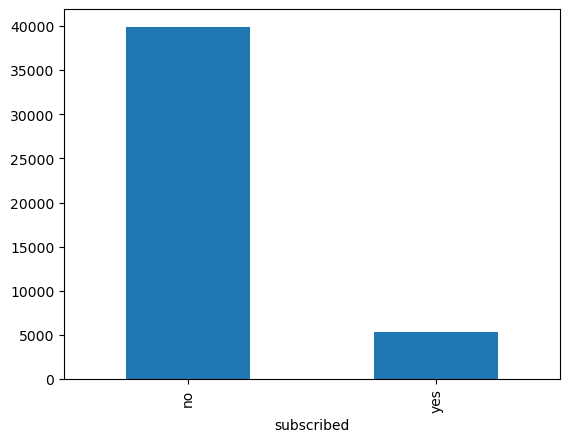

In [144]:
df['subscribed'].value_counts().plot(kind='bar');

In [151]:
df.groupby(['job','subscribed'])['subscribed'].count().sort_values()

job            subscribed
unknown        yes             34
housemaid      yes            109
entrepreneur   yes            123
self-employed  yes            187
unemployed     yes            202
unknown        no             254
student        yes            269
services       yes            369
retired        yes            516
admin.         yes            631
student        no             669
blue-collar    yes            708
technician     yes            840
unemployed     no            1101
housemaid      no            1131
management     yes           1301
entrepreneur   no            1364
self-employed  no            1392
retired        no            1748
services       no            3785
admin.         no            4540
technician     no            6757
management     no            8157
blue-collar    no            9024
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

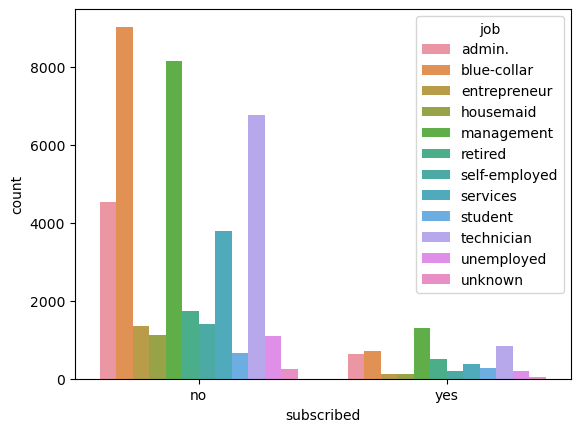

In [147]:
sns.countplot(data=df, x='subscribed' , hue='job')

In [152]:
df.groupby(['loan','subscribed'])['subscribed'].count().sort_values()

loan  subscribed
yes   yes             484
no    yes            4805
yes   no             6760
no    no            33162
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

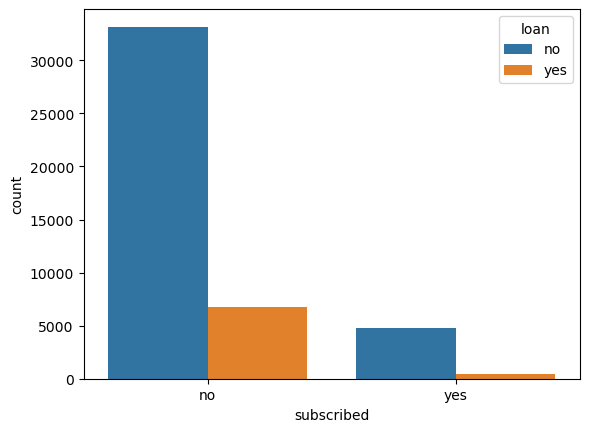

In [153]:
sns.countplot(data=df, x='subscribed' , hue='loan')

In [154]:
df.groupby(['education','subscribed'])['subscribed'].count().sort_values()

education  subscribed
unknown    yes             252
primary    yes             591
unknown    no             1605
tertiary   yes            1996
secondary  yes            2450
primary    no             6260
tertiary   no            11305
secondary  no            20752
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

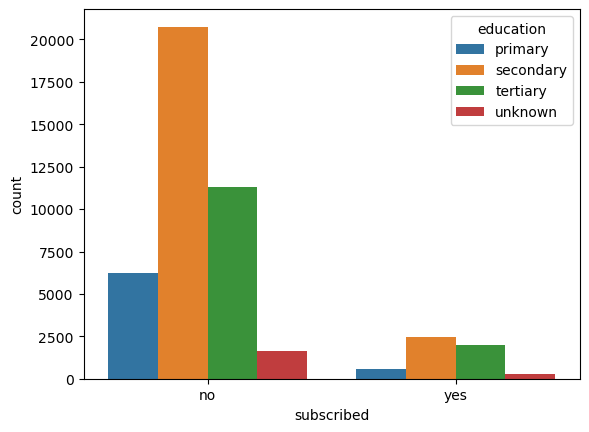

In [155]:
sns.countplot(data=df, x='subscribed' , hue='education')

<Axes: >

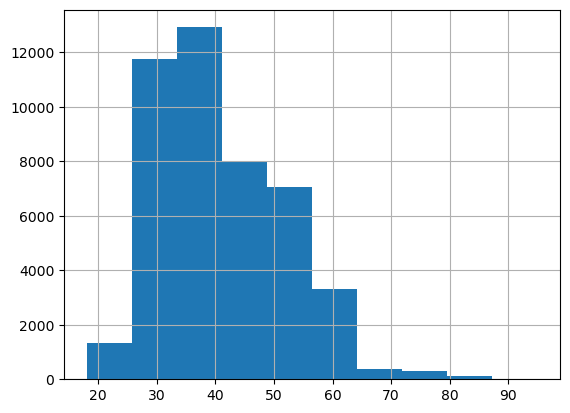

In [158]:
df['age'].hist()

In [159]:
df.groupby(['contact type','subscribed'])['subscribed'].count().sort_values()

contact type  subscribed
telephone     yes             390
unknown       yes             530
telephone     no             2516
cellular      yes            4369
unknown       no            12490
cellular      no            24916
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

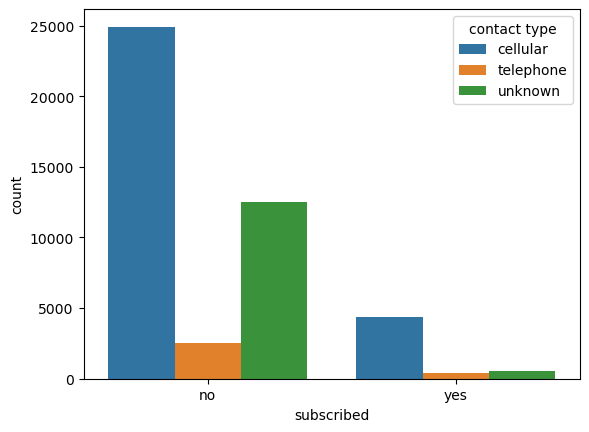

In [160]:
sns.countplot(data=df, x='subscribed' , hue='contact type')

In [169]:
subscribed=df[df['subscribed']=='yes']

<Axes: xlabel='age', ylabel='Count'>

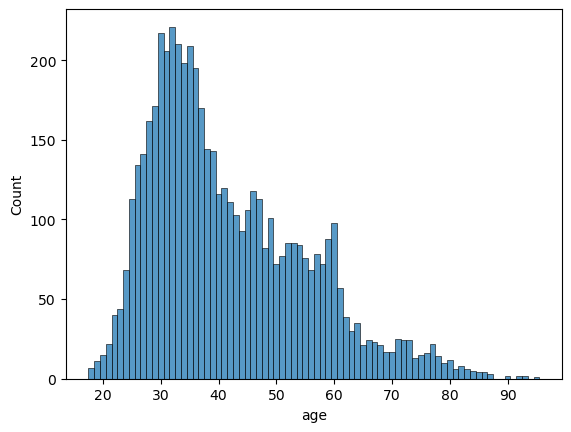

In [188]:
#the range of age that subscribed
sns.histplot(data=subscribed , x ='age', bins=30)

In [171]:
not_subscribed=df[df['subscribed']=='no']

<Axes: xlabel='age', ylabel='Count'>

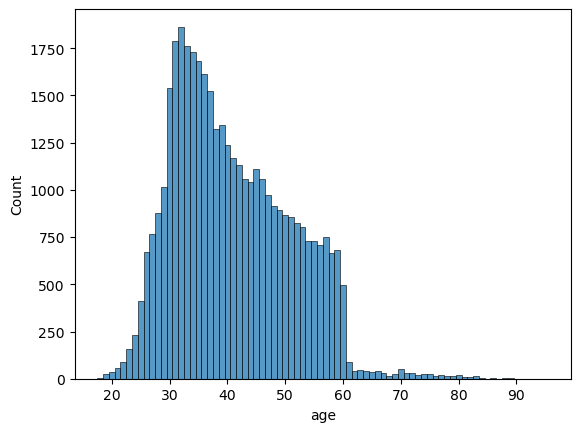

In [187]:
#the range of age that not subscribed
sns.histplot(data=not_subscribed , x ='age', bins=30)

,age,job,marital,education,balance,housing,loan,contact type,duration,campaign contacted,subscribed,date
0,58,management,married,tertiary,2143,yes,no,unknown,4.350000,1,no,2011-05-05
1,44,technician,single,secondary,29,yes,no,unknown,2.516667,1,no,2011-05-05
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,1.266667,1,no,2011-05-05
3,47,blue-collar,married,unknown,1506,yes,no,unknown,1.533333,1,no,2011-05-05
4,33,unknown,single,unknown,1,no,no,unknown,3.300000,1,no,2011-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...
45197,36,management,single,secondary,1511,yes,no,cellular,4.500000,1,yes,2011-11-16
45201,53,management,married,tertiary,583,no,no,cellular,3.766667,1,yes,2011-11-17
45202,34,admin.,single,secondary,557,no,no,cellular,3.733333,1,yes,2011-11-17
45203,23,student,single,tertiary,113,no,no,cellular,4.433333,1,yes,2011-11-17


<Axes: xlabel='campaign contacted', ylabel='Count'>

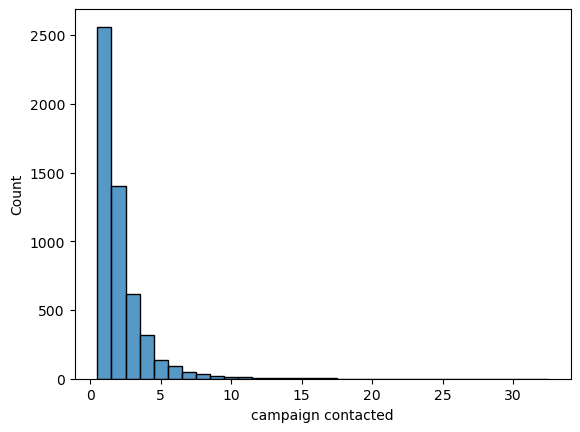

In [195]:
sns.histplot(data=subscribed, x='campaign contacted')

<Axes: xlabel='campaign contacted', ylabel='Count'>

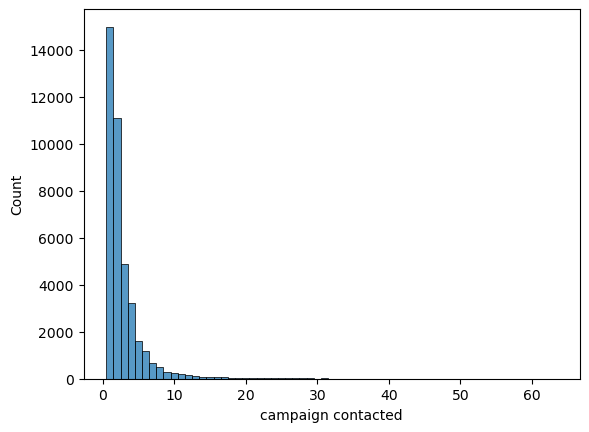

In [196]:
sns.histplot(data=not_subscribed, x='campaign contacted')

<Axes: xlabel='subscribed', ylabel='count'>

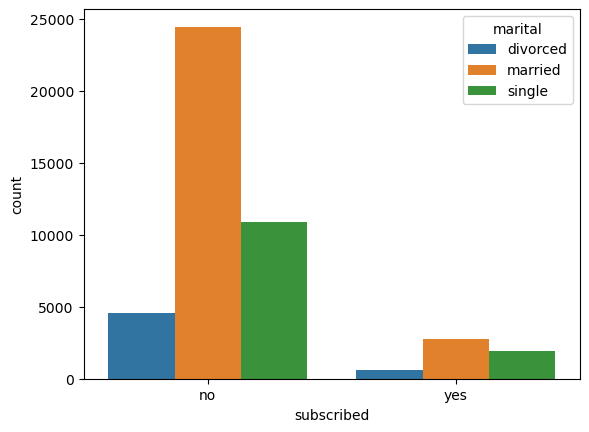

In [197]:
sns.countplot(data=df, x='subscribed' , hue='marital')